In [1]:
import tensorflow as tf

import keras

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import load_model
from keras import applications
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D

Using TensorFlow backend.


In [2]:
# MONTANDO A ESTRUTURA DA CNN #

base_model = keras.applications.resnet50.ResNet50(
        include_top=False,
        weights=None,
        input_shape=(64, 64, 3))

C:\Users\gui_p\anaconda3\envs\tensor\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [4]:
import h5py

print("versao do h5py:", h5py.__version__)

versao do h5py: 2.10.0


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# DIVIDIR AS 8000 IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

from keras.preprocessing.image import ImageDataGenerator

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_fruits/Training', 
                                         subset = 'training',
                                         batch_size = 16,
                                         target_size = (64, 64)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_fruits/Training',
                                         subset='validation',
                                         batch_size = 16,
                                         target_size = (64, 64))

Found 4160 images belonging to 11 classes.
Found 1037 images belonging to 11 classes.


In [7]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 10) #early stopping baseado na melhor acurácia de validação

In [8]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
260/260 [==============================] - 437s 2s/step - loss: 0.6651 - accuracy: 0.8332 - val_loss: 1.0466 - val_accuracy: 0.8014
Epoch 2/100
260/260 [==============================] - 423s 2s/step - loss: 0.1783 - accuracy: 0.9567 - val_loss: 0.5277 - val_accuracy: 0.8380
Epoch 3/100
260/260 [==============================] - 421s 2s/step - loss: 0.2290 - accuracy: 0.9591 - val_loss: 0.0245 - val_accuracy: 0.8640
Epoch 4/100
260/260 [==============================] - 421s 2s/step - loss: 0.1650 - accuracy: 0.9692 - val_loss: 0.9429 - val_accuracy: 0.8881
Epoch 5/100
260/260 [==============================] - 420s 2s/step - loss: 0.1371 - accuracy: 0.9764 - val_loss: 2.4052 - val_accuracy: 0.8611
Epoch 6/100
260/260 [==============================] - 421s 2s/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0011 - val_accuracy: 0.9325
Epoch 7/100
260/260 [==============================] - 419s 2s/step - loss: 0.0221 - accuracy: 0.9950 - val_loss: 6.4601e-04 - val_accur

In [9]:
model.save('1teste_ResNet50',
          overwrite = True) 

with open('trainHistoryDict_1teste_ResNet50', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
model = keras.models.load_model('1teste_ResNet50')
history = pickle.load(open('trainHistoryDict_1teste_ResNet50', "rb"))

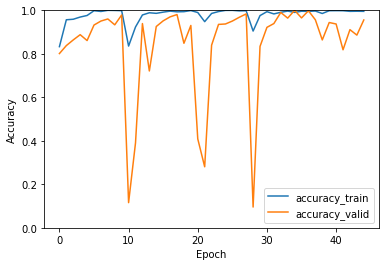

In [11]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #
plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

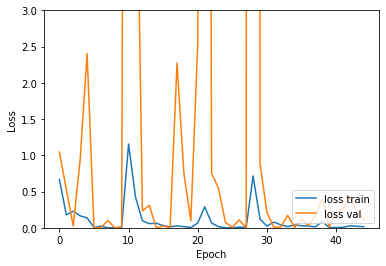

In [12]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [13]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_fruits/Test',
                                             target_size = (64, 64),
                                             batch_size = 1,
                                             shuffle=False)

Found 1739 images belonging to 11 classes.


In [14]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

1739/1739 [==============================] - 56s 32ms/step
acurácia nos dados de teste: 0.9344450831413269
loss dos dados de teste: 0.0


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print(test_data.classes)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(1739,)
[ 0  0  0 ... 10 10 10]
Accuracy
0.9344450833812536
Balanced Accuracy
0.9368070953436807
Confusion Matrix
[[164   0   0   0   0   0   0   0   0   0   0]
 [  0 164   0   0   0   0   0   0   0   0   0]
 [  0   0 156   0   0   0   0   0   0   0   0]
 [  0   0   0 166   0   0   0   0   0   0   0]
 [  0  55   0   0 109   0   0   0   0   0   0]
 [  0   0   0   0   0 146   0   0   0   0   0]
 [  0   0   0   2   0   0 105  57   0   0   0]
 [  0   0   0   0   0   0   0 166   0   0   0]
 [  0   0   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   0   0   0   0 150   0]
 [  0   0   0   0   0   0   0   0   0   0 157]]
Classification Report


In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

Total params: 23,610,251
Trainable params: 23,557,131
Non-trainable params: 53,120
__________________________________________________________________________________________________
